### Question 1


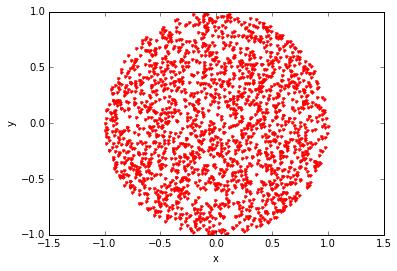

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

N = 2000
x_arr = []
y_arr = []

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1)) #inversion
    x_arr.append(r*np.cos(theta))
    y_arr.append(r*np.sin(theta))

plt.plot(x_arr, y_arr, 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Question 2

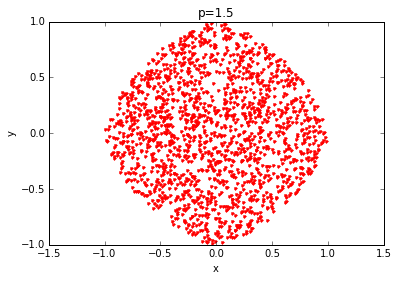

Acceptance rate : 0.863


In [2]:
def gatekeeper(x, y, p):
    xx = np.absolute(x)
    yy = np.absolute(y)
    dist = np.power(np.power(xx,p) + np.power(yy,p), np.power(p,-1))

    if dist <= 1:
        return 1 # inside
    else:
        return 0 # outside

p = 1.5
x_arr = []
y_arr = []
acc = 0 # number of accepted points

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    if gatekeeper(x, y, p):
        acc += 1
        x_arr.append(x)
        y_arr.append(y)

plt.plot(x_arr, y_arr, 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=1.5')
plt.show()
print('Acceptance rate :', acc/N)

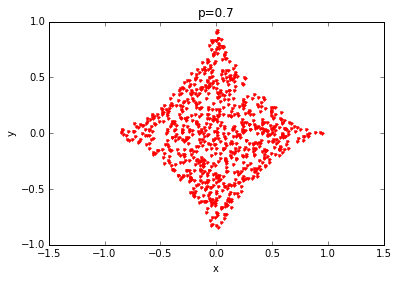

Acceptance rate : 0.416


In [3]:
p = 0.7
x_arr = []
y_arr = []
acc = 0 # number of accepted points

for i in range(N):
    theta = 2.0*np.pi*np.random.rand(1)
    r = np.sqrt(np.random.rand(1))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    if gatekeeper(x, y, p):
        acc += 1
        x_arr.append(x)
        y_arr.append(y)

plt.plot(x_arr, y_arr, 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=0.7')
plt.show()
print('Acceptance rate :', acc/N)

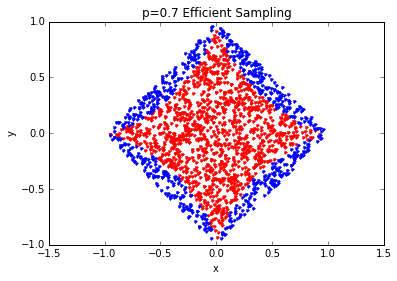

Acceptance rate : 0.6495


In [4]:
# More efficient sampler
# Sample in a square,
# shrink it,
# then rotate the square ccw pi/4

p = 0.7
x_arr = []
y_arr = []

x_arr1 = []
y_arr1 = []

acc = 0 # number of accepted points

t = np.pi/4
rot_mat = [[np.cos(t), -np.sin(t)],[np.sin(t),np.cos(t)]]

lmt = 1/np.sqrt(2)

for i in range(N):
    x = np.random.uniform(-lmt,lmt)
    y = np.random.uniform(-lmt,lmt)
    [x1,y1] = np.dot(rot_mat,[[x],[y]])
    
    if gatekeeper(x1, y1, p):
        acc += 1
        x_arr.append(x1)
        y_arr.append(y1)
    else :
        x_arr1.append(x1)
        y_arr1.append(y1)        

plt.plot(x_arr, y_arr, 'r.')
plt.plot(x_arr1, y_arr1, 'b.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('p=0.7 Efficient Sampling')
plt.show()
print('Acceptance rate :', acc/N)

### Bonus

In [64]:
n = 10 # number of dimensions
m = n-1 # number of angles
mean = np.zeros(m)
cov = np.eye(m)

angles = [] # Contains N*m angles
r_arr = [] # Contains N radius

for i in range(N):
    r = np.power(np.random.rand(1),1/n)
    nd = np.random.multivariate_normal(mean, cov) # Do I need to multiply it by 2pi?
    
    # Normalize nd
    norm = 0
    for i in range(0,m):
        norm += np.power(nd[i],2)
    nd = nd/np.sqrt(norm)
    
    angles.append(nd)
    r_arr.append(r)

In [67]:
# An alternative way to implement the same sampler would be to use rejection sam-
# pling. Consider bounding the n-sphere by a corresponding n-cube (In 2D, this cor-
# responds to bounding the unit circle by a square). By defition, we only accept the
# samples which are inside the n-sphere. In other words, the samples that lie outside the
# n-sphere get discarded. How would the acceptance rate change as n gets larger?

# Approximately proportional to pi^(n/2)